<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Foundations of Data Science
</font>
<hr/>
<font color="#900090" size=5>
Phase 1
<br>
</font>
<font size=5>
Instructor: Dr. Khalaj
<br>
</font>
<font size=4>
Fall 2024
<br>
<font face="Times New Roman" size=4>
Amirreza Tanevardi 400100898
</font>

</div></font>

# Setup and Imports

In [1]:
# Step 1: Install Kaggle API and authenticate using the Kaggle CLI
!pip install -q kaggle

# Step 2: Use the Kaggle API to download the dataset
!kaggle datasets download -d nechbamohammed/research-papers-dataset -p /content

# Step 3: Unzip the downloaded file
!unzip /content/research-papers-dataset.zip -d /content

# List files to verify the extraction
!ls /content


Dataset URL: https://www.kaggle.com/datasets/nechbamohammed/research-papers-dataset
License(s): unknown
 98% 580M/590M [00:05<00:00, 136MB/s]
100% 590M/590M [00:05<00:00, 122MB/s]
Archive:  /content/research-papers-dataset.zip
  inflating: /content/dblp-v10.csv   
dblp-v10.csv  research-papers-dataset.zip  sample_data


In [ ]:
!pip install -U langchain-community psycopg2-binary transformers keybert spacy tabulate
!pip install keybert
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 

In [ ]:
!pip uninstall -y community
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk
from scipy.stats import pearsonr, spearmanr
from collections import Counter
import ast
from tabulate import tabulate
import networkx as nx
import os
import spacy
from langchain.vectorstores import FAISS
from langchain.embeddings.base import Embeddings
from langchain.docstore.document import Document
import random
from collections import defaultdict
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from transformers import BertTokenizer, BertModel
import json
from keybert import KeyBERT


# 1. EDA

In [ ]:
# Load the dataset
file_path = "dblp-v10.csv"

## 1.1 Basic

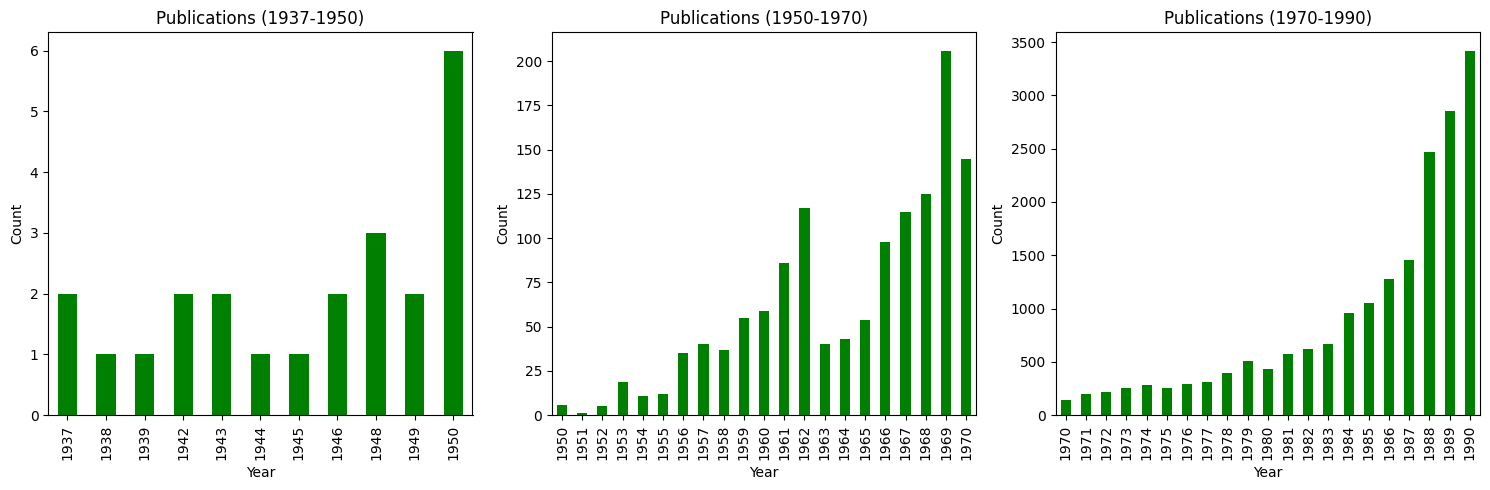

In [ ]:
### Task 1: Bar Charts of Number of Publications
year_ranges = [(1937, 1950), (1950, 1970), (1970, 1990)]
df = pd.read_csv(file_path, usecols=["year"])
df = df[df["year"] > 1900]  # Filter out invalid years

plt.figure(figsize=(15, 5))
for i, (start, end) in enumerate(year_ranges):
    plt.subplot(1, 3, i + 1)
    yearly_counts = df[(df["year"] >= start) & (df["year"] <= end)]["year"].value_counts().sort_index()
    yearly_counts.plot(kind="bar", color="green")
    plt.title(f"Publications ({start}-{end})")
    plt.xlabel("Year")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

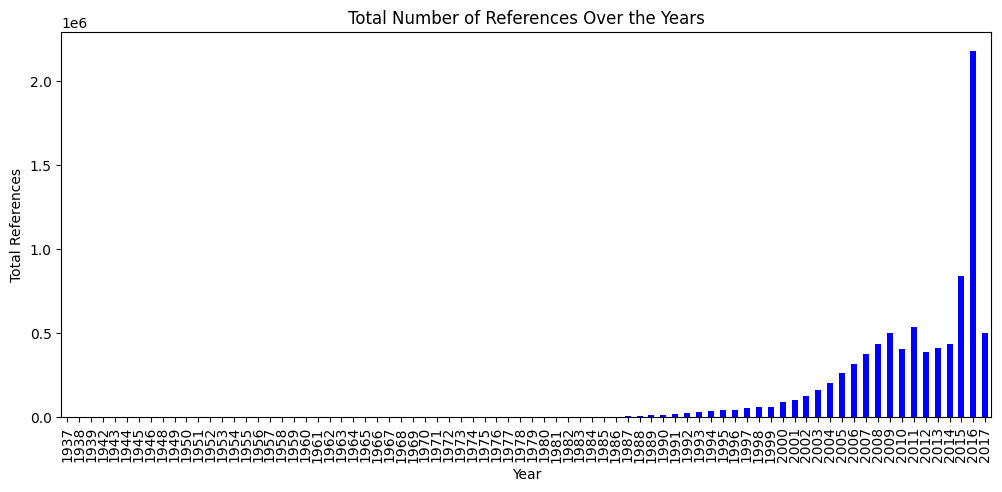

In [ ]:
### Task 2: Bar Chart of References Over the Years
df = pd.read_csv(file_path, usecols=["year", "references"])
df["references"] = df["references"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 0)

plt.figure(figsize=(12, 5))
df.groupby("year")["references"].sum().plot(kind="bar", color="blue")
plt.title("Total Number of References Over the Years")
plt.xlabel("Year")
plt.ylabel("Total References")
plt.show()

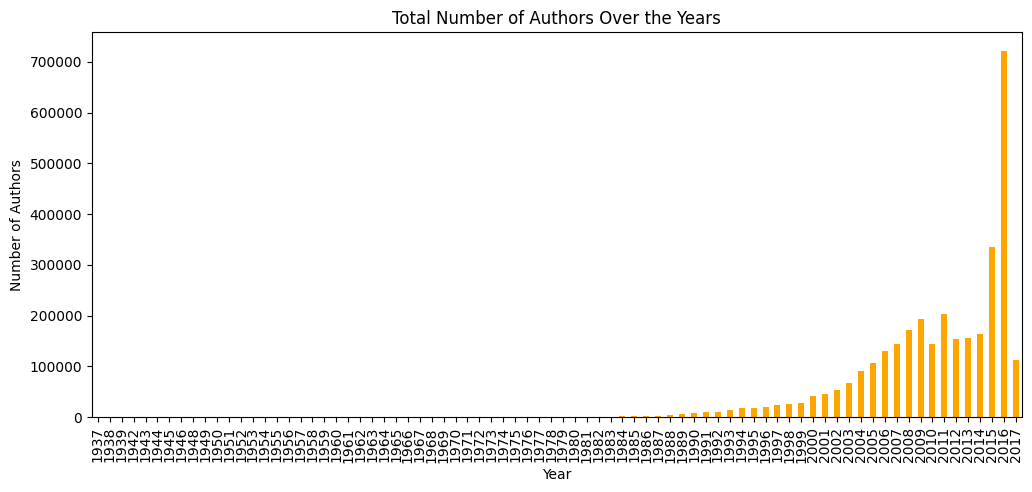

In [ ]:
### Task 3: Bar Chart of Authors Over the Years
df = pd.read_csv(file_path, usecols=["year", "authors"])
df["authors"] = df["authors"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 1)

plt.figure(figsize=(12, 5))
df.groupby("year")["authors"].sum().plot(kind="bar", color="orange")
plt.title("Total Number of Authors Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Authors")
plt.show()

In [ ]:
### Task 4: Pearson & Spearman Correlation - Authors vs References
df = pd.read_csv(file_path, usecols=["authors", "references"])
df["authors"] = df["authors"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 1)
df["references"] = df["references"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 0)

pearson_authors_refs, _ = pearsonr(df["authors"], df["references"])
spearman_authors_refs, _ = spearmanr(df["authors"], df["references"])

print(f"Pearson Authors-References: {pearson_authors_refs:.4f}")
print(f"Spearman Authors-References: {spearman_authors_refs:.4f}")

Pearson Authors-References: 0.0560
Spearman Authors-References: 0.0872


In [ ]:
### Task 5: Pearson & Spearman Correlation - Authors vs Citations
df_corr2 = pd.read_csv(file_path, usecols=["authors", "n_citation"])
df_corr2["authors"] = df_corr2["authors"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 1)

pearson_authors_citations, _ = pearsonr(df_corr2["authors"], df_corr2["n_citation"])
spearman_authors_citations, _ = spearmanr(df_corr2["authors"], df_corr2["n_citation"])

print(f"Pearson Authors-Citations: {pearson_authors_citations:.4f}")
print(f"Spearman Authors-Citations: {spearman_authors_citations:.4f}")

Pearson Authors-Citations: -0.0028
Spearman Authors-Citations: -0.0166


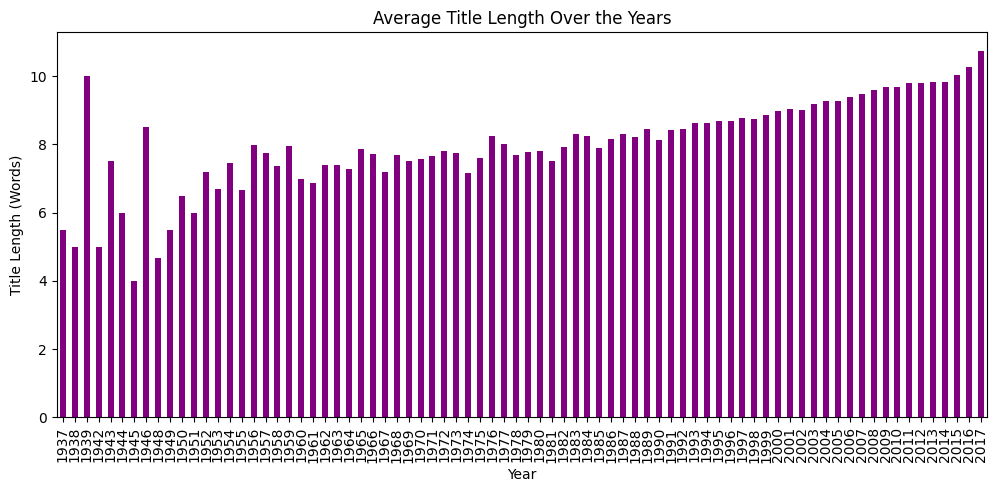

In [ ]:
### Task 6: Bar Chart of Title Length Over the Years
df_titles = pd.read_csv(file_path, usecols=["year", "title"])
df_titles["title_length"] = df_titles["title"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

plt.figure(figsize=(12, 5))
df_titles.groupby("year")["title_length"].mean().plot(kind="bar", color="purple")
plt.title("Average Title Length Over the Years")
plt.xlabel("Year")
plt.ylabel("Title Length (Words)")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


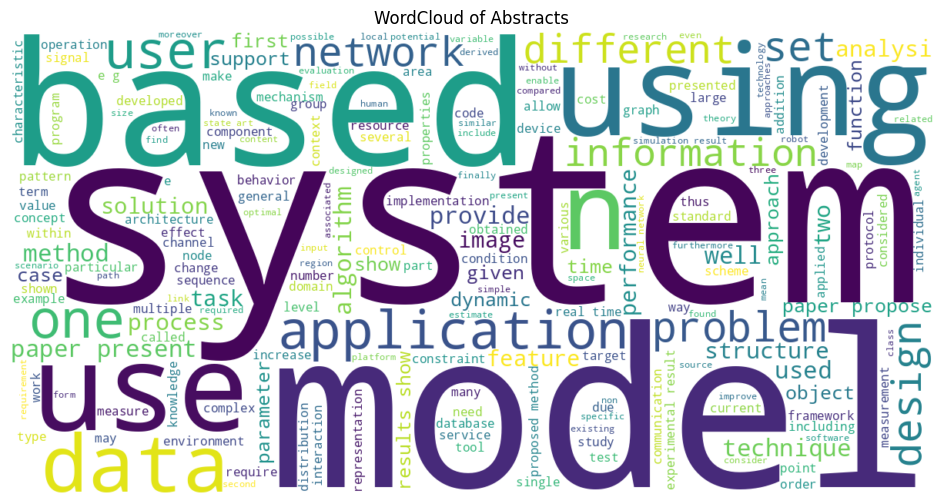

In [ ]:
### Task 7: Wordcloud of Abstracts
# Download stopwords if not already downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load the dataset with a robust encoding strategy
file_path = "dblp-v10.csv"  # Update this path accordingly

# Try different encodings if needed
try:
    df = pd.read_csv(file_path, usecols=["abstract"], encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, usecols=["abstract"], encoding="ISO-8859-1")

# Drop missing abstracts
df = df.dropna()

df = df.sample(frac=0.05, random_state=42)

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.encode("ascii", "ignore").decode()  # Remove non-ASCII characters (fixes "â" issues)
    text = re.sub(r'[:,/]', ' ', text)  # Explicitly remove commas, colons, and slashes
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove all remaining punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Clean all abstracts
df["cleaned_abstract"] = df["abstract"].apply(clean_text)

# Combine all abstracts into a single string
all_text = " ".join(df["cleaned_abstract"])

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="viridis").generate(all_text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Abstracts")
plt.show()


Pearson Correlation: 0.1000
Spearman Correlation: 0.1478


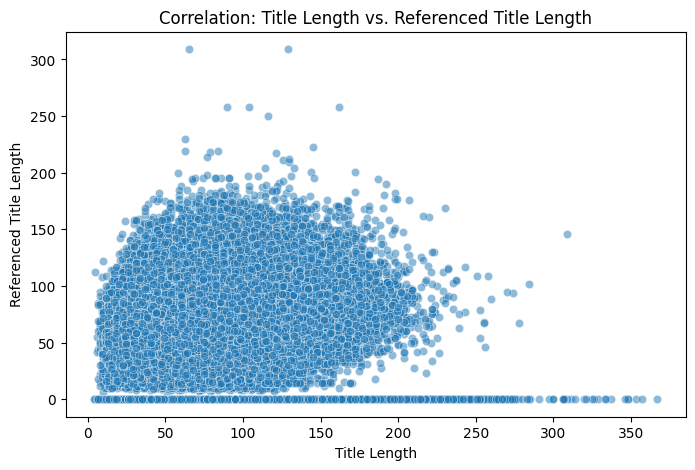

In [ ]:
#  Task 8: Correlation Title Length vs Referenced Title Length

# Load only 'id', 'title', and 'references' columns
df = pd.read_csv(file_path, usecols=["id", "title", "references"])

# Compute title length
df["title_length"] = df["title"].apply(lambda x: len(str(x)))

# Convert 'references' column from string to list
df["references"] = df["references"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])

# Create a dictionary for quick lookup of title lengths by paper ID
title_length_dict = df.set_index("id")["title_length"].to_dict()

# Function to compute average referenced title length
def avg_referenced_title_length(ref_list):
    ref_lengths = [title_length_dict[ref] for ref in ref_list if ref in title_length_dict]
    return sum(ref_lengths) / len(ref_lengths) if ref_lengths else 0

# Compute the average title length of referenced papers
df["referenced_title_length"] = df["references"].apply(avg_referenced_title_length)

# Drop rows with missing values (if any)
df.dropna(subset=["title_length", "referenced_title_length"], inplace=True)

# Compute Pearson & Spearman correlation coefficients
pearson_corr, _ = pearsonr(df["title_length"], df["referenced_title_length"])
spearman_corr, _ = spearmanr(df["title_length"], df["referenced_title_length"])

# Display results
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

# Scatter plot visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="title_length", y="referenced_title_length", alpha=0.5)
plt.xlabel("Title Length")
plt.ylabel("Referenced Title Length")
plt.title("Correlation: Title Length vs. Referenced Title Length")
plt.show()


In [ ]:
### Task 9: Top 10 Authors with Most Publications
df = pd.read_csv(file_path, usecols=["authors"])
df["authors"] = df["authors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])
author_counts = pd.Series([author for authors in df["authors"] for author in authors]).value_counts()

print("\nTop 10 Authors by Publications:")
print(author_counts.head(10))


Top 10 Authors by Publications:
Wei Wang       950
Wei Zhang      657
Yang Liu       629
Lei Zhang      579
Wei Li         559
Jun Wang       544
Lei Wang       519
Lajos Hanzo    458
Wei Liu        456
Jun Zhang      455
Name: count, dtype: int64


In [ ]:
### Task 10: Top 10 Authors with Most Citations
df = pd.read_csv(file_path, usecols=["authors", "n_citation"])
df["authors"] = df["authors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])
author_citations = {}

for _, row in df.iterrows():
    for author in row["authors"]:
        author_citations[author] = author_citations.get(author, 0) + row["n_citation"]

top_cited_authors = pd.Series(author_citations).sort_values(ascending=False)

print("\nTop 10 Authors by Citations:")
print(top_cited_authors.head(10))


Top 10 Authors by Citations:
David G. Lowe        65344
Hari Balakrishnan    55096
Scott Shenker        54164
Ian F. Akyildiz      53654
Michael I. Jordan    53448
Ion Stoica           52890
Chih-Jen Lin         52302
Takeo Kanade         50743
Deborah Estrin       49925
Vladimir Vapnik      49755
dtype: int64


In [ ]:
### Task 11: Top 10 Papers with Most References
df = pd.read_csv(file_path, usecols=["id", "references"])
df["num_references"] = df["references"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else 0)

print("\nTop 10 Papers by References:")
print(df.nlargest(10, "num_references")[["id", "num_references"]])



Top 10 Papers by References:
                                          id  num_references
371369  c6090c87-4730-4ae6-86cd-7663adb23b2b             759
780292  a1c66cbc-77ad-4167-9787-4936221427ad             561
104143  6d4c5b32-8e13-4022-b67f-1ace7ffc91d0             412
214646  91f1068b-9feb-4799-b920-67205c36999b             396
484969  ebe93176-7150-4ce6-8d77-880a4e13beb0             394
223901  95044198-6db4-4224-a499-d8e8a3e1f52d             386
302124  af0e7b77-e5c3-4d64-adc2-cc43a4b0976e             363
707510  0d3b901e-4179-4ed6-badf-7ce4237dadd4             361
325083  b6b998ee-2e78-4d0e-8c55-e7806e449b9e             343
538381  fdbb0c65-8b80-43e7-a839-8738e03cd72e             326


In [ ]:
### Task 12: Find the top 10 papers with the most citations within the dataset.
df = pd.read_csv(file_path, usecols=["id", "n_citation"])

print("\nTop 10 Papers by Citations:")
print(df.nlargest(10, "n_citation"))


Top 10 Papers by Citations:
        n_citation                                    id
332760       42508  b944f77f-113b-4a02-ae5e-d4a124b8fd5b
294527       34288  ac744614-9003-4ccb-93bf-2fe5b1ef4166
358174       33016  c1b6b493-01ef-420f-be44-7bacfe34e846
716671       28679  f6bd8b64-684d-429a-aab5-8ff3a2c23cd6
18485        26114  50dd56db-151d-4d62-8576-65f0ef6f381b
45248        24381  59af7e25-c0ee-4af5-acea-a58dfe4ccac4
81801        24245  65d5ccdc-7022-45b0-adf9-0385273b1283
150727       24182  7ccbdf09-a84e-4ad2-ab20-cb28b6c41155
458466       22884  e2f7a74a-8430-4463-94ce-fe85dfd309f9
442067       22795  dd83785a-dd19-41e3-9b25-ebabbd48d336


R² Score: 0.3387
(Closer to 1 means strong prediction, closer to 0 means weak prediction)


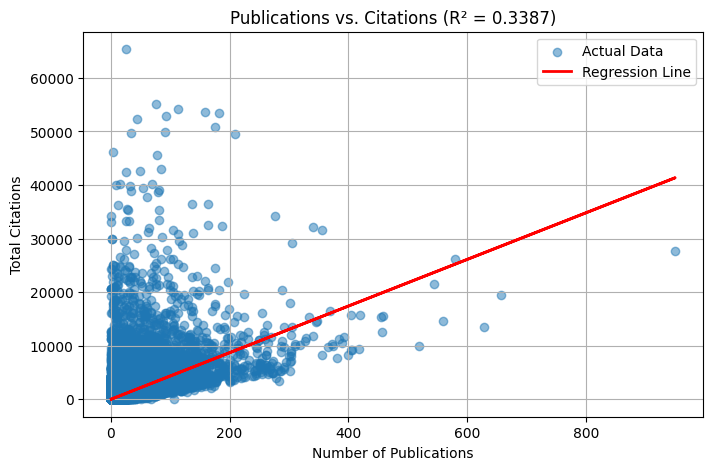

In [ ]:
### Task 13: Predicting Citations Based on Publications (Linear Regression)
# Load dataset
df = pd.read_csv(file_path, usecols=["authors", "n_citation"])

# Drop missing values
df = df.dropna()

# Convert authors from string to list if necessary
df["authors"] = df["authors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count number of publications per author
author_publications = Counter(author for authors in df["authors"] for author in authors)

# Compute total citations per author
author_citations = Counter()
for _, row in df.iterrows():
    for author in row["authors"]:
        author_citations[author] += row["n_citation"]

# Convert data to a DataFrame
author_stats = pd.DataFrame({
    "Author": list(author_publications.keys()),
    "Publications": list(author_publications.values()),
    "Total Citations": [author_citations[author] for author in author_publications.keys()]
})

# Perform Linear Regression
X = author_stats["Publications"].values.reshape(-1, 1)  # Features: Number of Publications
y = author_stats["Total Citations"].values  # Target: Total Citations

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Compute R² Score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")
print("(Closer to 1 means strong prediction, closer to 0 means weak prediction)")

# Scatter Plot & Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Number of Publications")
plt.ylabel("Total Citations")
plt.title(f"Publications vs. Citations (R² = {r2:.4f})")
plt.legend()
plt.grid()
plt.show()


## 1.2 Network Analysis

### 1.2.1 Citation Network (Paper-Paper Network)



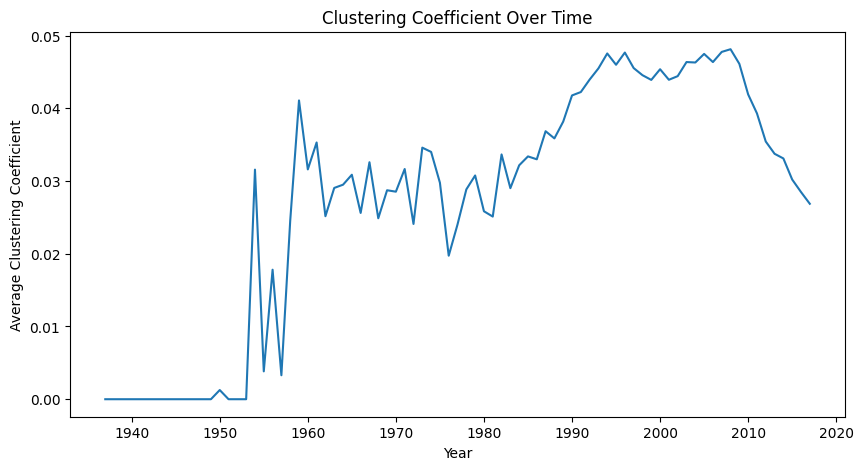

Average Path Length: 11.288044063779358
Diameter: 29
Top 10 Influential Papers (by PageRank):
Paper ID: 6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3, PageRank Score: 0.000223
Paper ID: c1b6b493-01ef-420f-be44-7bacfe34e846, PageRank Score: 0.000191
Paper ID: b944f77f-113b-4a02-ae5e-d4a124b8fd5b, PageRank Score: 0.000180
Paper ID: f6bd8b64-684d-429a-aab5-8ff3a2c23cd6, PageRank Score: 0.000138
Paper ID: 2659531e-eb9d-4dd5-b46f-10f66a4819c6, PageRank Score: 0.000116
Paper ID: 748a2ab3-8b5f-4d0a-9e2d-af685089843a, PageRank Score: 0.000106
Paper ID: e0f3a738-4ab2-40d1-ba44-506d81c1d230, PageRank Score: 0.000097
Paper ID: 8026f56a-a93e-4933-8ead-c9aa9e3f0498, PageRank Score: 0.000094
Paper ID: 7ccbdf09-a84e-4ad2-ab20-cb28b6c41155, PageRank Score: 0.000093
Paper ID: d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706, PageRank Score: 0.000093


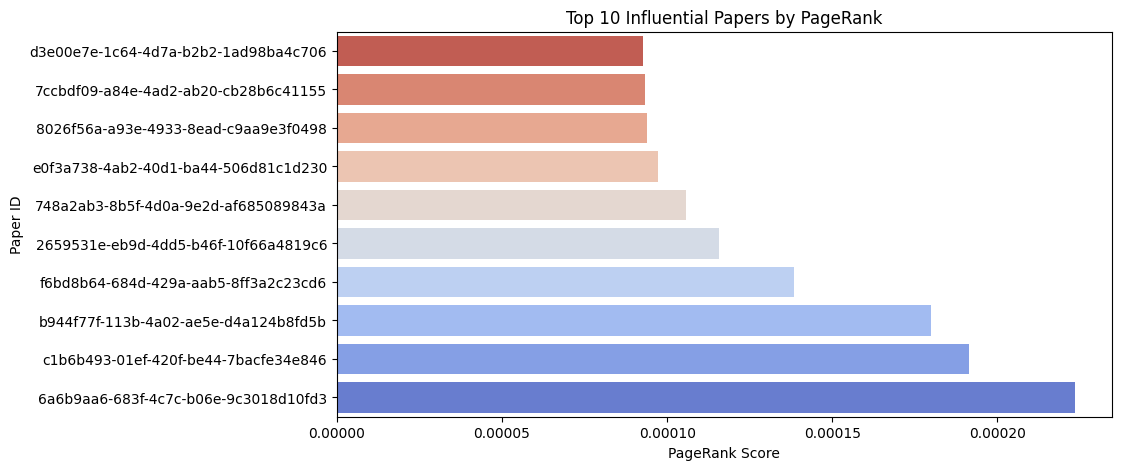

In [ ]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load only 'id' and 'references' to construct the citation network
df_citations = pd.read_csv(file_path, usecols=["id", "references"])

# Convert 'references' from string to list
df_citations["references"] = df_citations["references"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
)

# Create a directed graph (Citation Network)
G = nx.DiGraph()

# Add nodes (papers)
G.add_nodes_from(df_citations["id"])

# Add edges (citations)
edges = [(paper_id, ref_id) for paper_id, refs in zip(df_citations["id"], df_citations["references"]) for ref_id in refs]
G.add_edges_from(edges)

# 1️⃣ Plot the Clustering Coefficient Over Time
df_citations["clustering_coefficient"] = df_citations["id"].apply(lambda x: nx.clustering(G, x) if x in G else 0)
df_citations["year"] = pd.read_csv(file_path, usecols=["id", "year"])["year"]  # Load years separately
clustering_by_year = df_citations.groupby("year")["clustering_coefficient"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=clustering_by_year)
plt.xlabel("Year")
plt.ylabel("Average Clustering Coefficient")
plt.title("Clustering Coefficient Over Time")
plt.show()

# 2️⃣ Compute Average Path Length and Diameter
largest_component = max(nx.strongly_connected_components(G), key=len)  # Get the largest strongly connected component
G_sub = G.subgraph(largest_component)  # Consider only the largest component

try:
    avg_path_length = nx.average_shortest_path_length(G_sub)
    diameter = nx.diameter(G_sub)
except nx.NetworkXError:
    avg_path_length, diameter = np.nan, np.nan  # Handle disconnected graphs

print(f"Average Path Length: {avg_path_length}")
print(f"Diameter: {diameter}")

# 3️⃣ Identify Influential Papers Using PageRank
pagerank_scores = nx.pagerank(G)
top_10_papers = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Influential Papers (by PageRank):")
for paper, score in top_10_papers:
    print(f"Paper ID: {paper}, PageRank Score: {score:.6f}")

# Bar Chart of Top 10 Papers by PageRank
plt.figure(figsize=(10, 5))
sns.barplot(x=[p[1] for p in top_10_papers], y=[p[0] for p in top_10_papers], palette="coolwarm")
plt.xlabel("PageRank Score")
plt.ylabel("Paper ID")
plt.title("Top 10 Influential Papers by PageRank")
plt.gca().invert_yaxis()
plt.show()


### 1.2.2 Co-authorship Network (Author-Author Network)

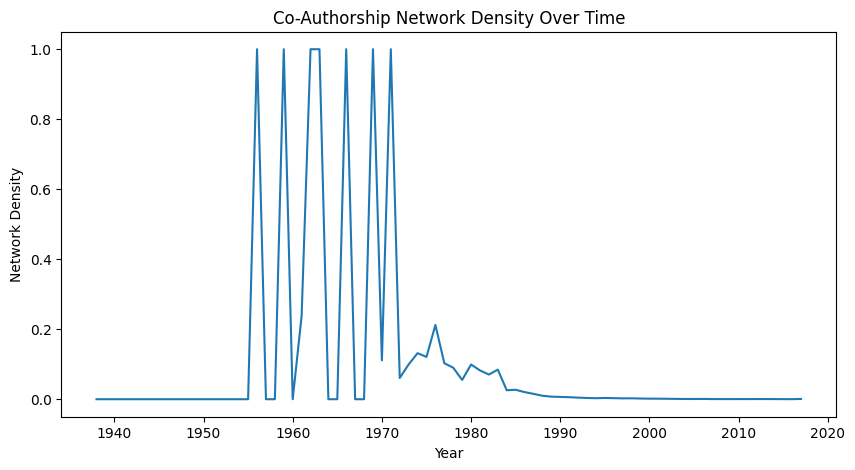

In [ ]:
# Load only 'authors' and 'year' columns to construct co-authorship network
df = pd.read_csv(file_path, usecols=["authors", "year"])

df = df.sample(frac=0.05, random_state=42)

# Convert 'authors' from string to list
df["authors"] = df["authors"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
)

# Create an undirected graph (Co-authorship Network)
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    authors = row["authors"]
    year = row["year"]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j], year=year)  # Connect co-authors

# 1️⃣ Compute Network Density Per Year
density_per_year = {}
for year in sorted(df["year"].unique()):
    edges_in_year = [(u, v) for u, v, d in G.edges(data=True) if d["year"] == year]
    G_sub = nx.Graph(edges_in_year)
    density_per_year[year] = nx.density(G_sub)

plt.figure(figsize=(10, 5))
sns.lineplot(x=list(density_per_year.keys()), y=list(density_per_year.values()))
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.title("Co-Authorship Network Density Over Time")
plt.show()

Top 10 Authors by Degree Centrality: ['Zhen Zhang', 'Henning Hermjakob', 'S. Avino', 'F. Acernese', 'P. Amico', 'M. Alshourbagy', 'S. Aoudia', 'D. Babusci', 'G. Ballardin', 'R. Barille']
Top 10 Authors by Betweenness Centrality: ['Wei Wang', 'Peng Zhang', 'Yang Liu', 'Yu Wang', 'Kai Yu', 'Ming Zhang', 'Peng Wang', 'Xin Wang', 'Yan Chen', 'Wei Li']
Top 10 Authors by Closeness Centrality: ['Wei Wang', 'Peng Zhang', 'Peng Wang', 'Jing Wang', 'Yang Liu', 'Jun Wang', 'Yan Zhang', 'Bin Liu', 'Wei Li', 'Jian Wang']


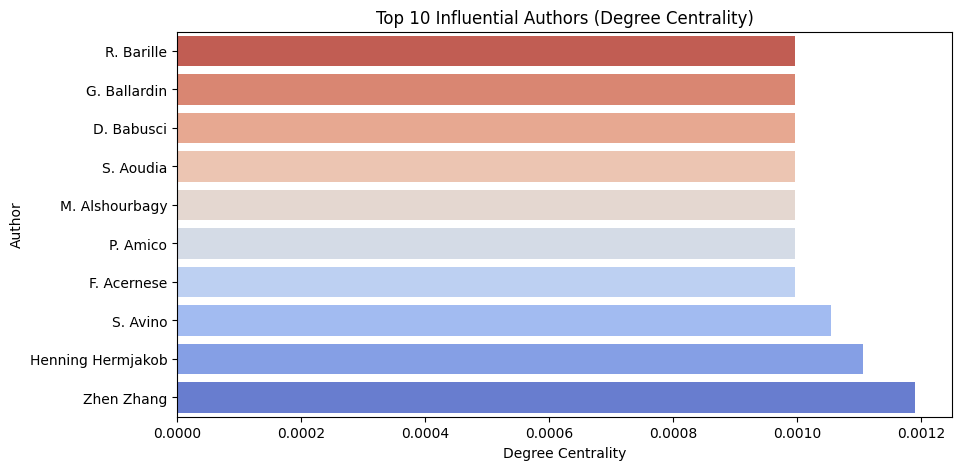

In [ ]:
# 2️⃣ Identify Influential Researchers Using Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True, k=200)
closeness_centrality = nx.closeness_centrality(G, distance=None, wf_improved=True)

# Find top 10 researchers for each centrality measure
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Authors by Degree Centrality:", [x[0] for x in top_10_degree])
print("Top 10 Authors by Betweenness Centrality:", [x[0] for x in top_10_betweenness])
print("Top 10 Authors by Closeness Centrality:", [x[0] for x in top_10_closeness])

# Bar Chart of Top 10 Authors by Degree Centrality
plt.figure(figsize=(10, 5))
sns.barplot(x=[p[1] for p in top_10_degree], y=[p[0] for p in top_10_degree], palette="coolwarm")
plt.xlabel("Degree Centrality")
plt.ylabel("Author")
plt.title("Top 10 Influential Authors (Degree Centrality)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from community import community_louvain

# 3️⃣ Find Communities of Authors
partition = community_louvain.best_partition(G)  # Louvain community detection
community_sizes = Counter(partition.values())

# Print Top 5 Largest Communities
print("Top 5 Largest Author Communities:")
for community, size in community_sizes.most_common(5):
    print(f"Community {community}: {size} members")

Top 5 Largest Author Communities:
Community 0: 1260 members
Community 56: 1214 members
Community 6: 1056 members
Community 77: 924 members
Community 193: 856 members


### 1.2.3 Venue Network (Conference-Journal Network)

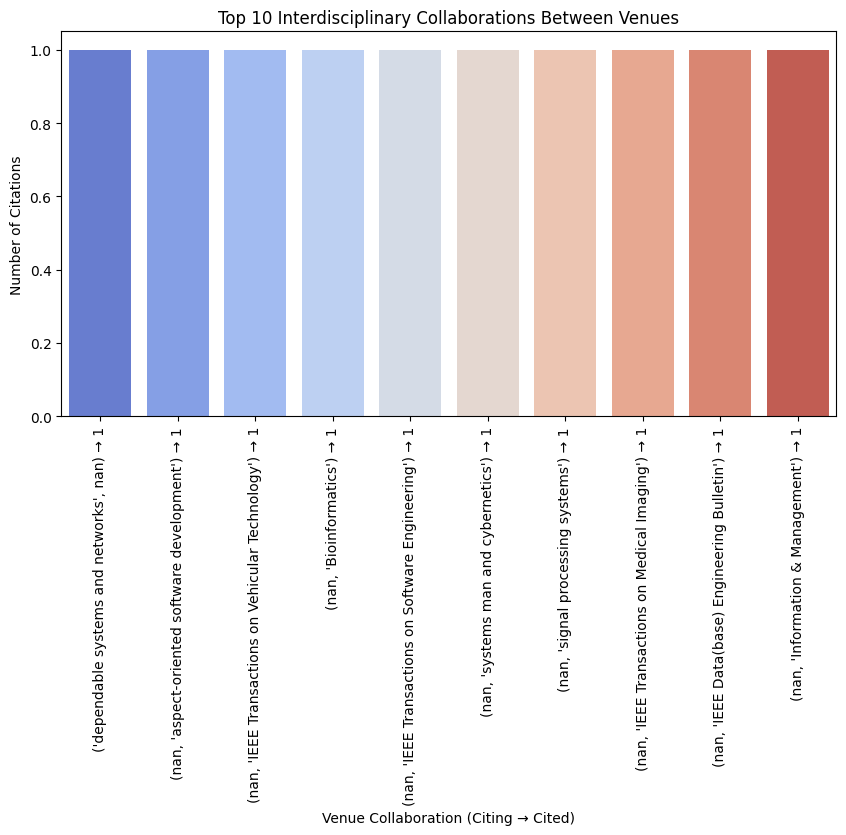

Top 10 Venues by Degree Centrality: [nan, 'IEEE Transactions on Communications', 'Journal of Machine Learning Research', 'Neural Computation', 'international conference on communications', 'IEEE Communications Letters', 'Bioinformatics', 'intelligent robots and systems', 'neural information processing systems', 'IEEE Transactions on Medical Imaging']
Top 10 Venues by Betweenness Centrality: [nan, 'IEEE Transactions on Communications', 'IEEE Communications Letters', 'design automation conference', 'international conference on communications', 'IEEE Transactions on Very Large Scale Integration Systems', 'empirical methods in natural language processing', 'international test conference', 'IEEE Transactions on Signal Processing', 'IEEE Transactions on Vehicular Technology']
Top 10 Venues by PageRank: ['Journal of Machine Learning Research', 'Journal of Artificial Intelligence Research', nan, 'IEEE Transactions on Pattern Analysis and Machine Intelligence', 'Neural Computation', 'IEEE Trans

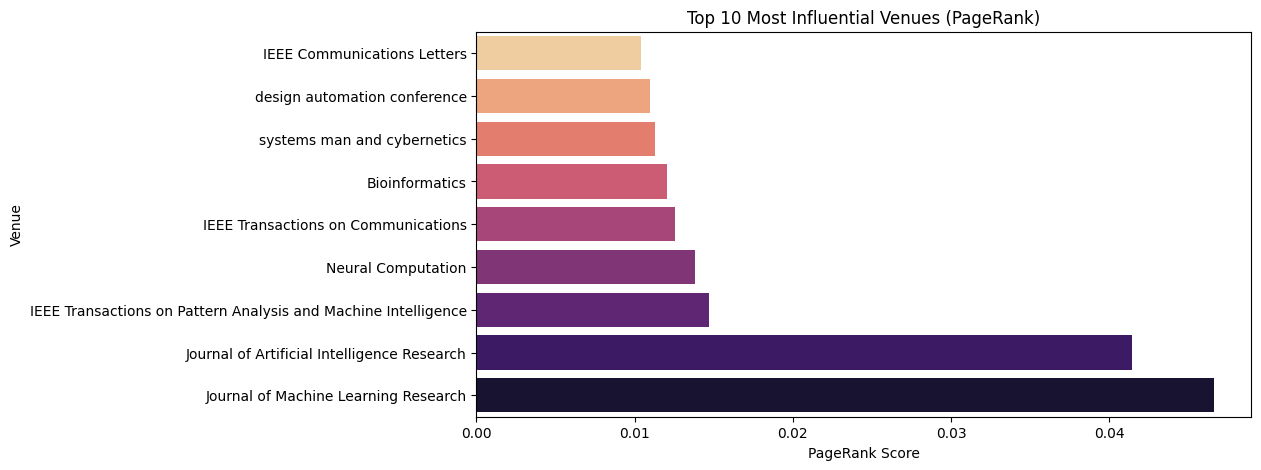

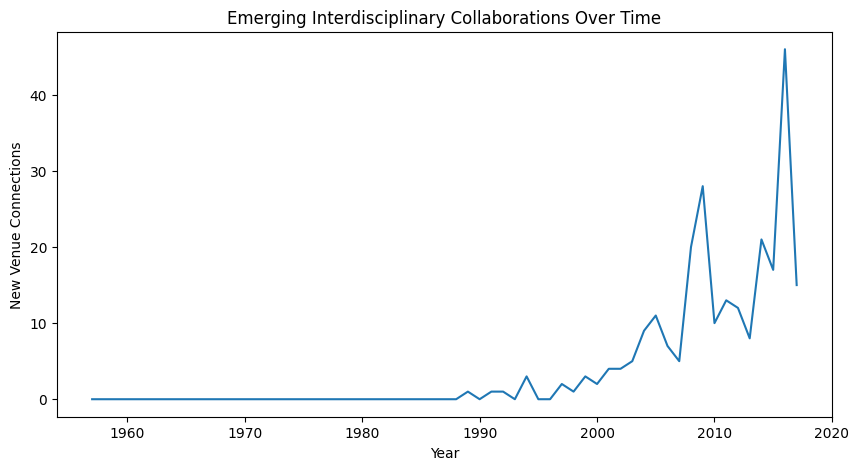

In [ ]:
# Load only necessary columns
df = pd.read_csv(file_path, usecols=["venue", "references", "year", "id"])

df = df.sample(frac=0.01, random_state=42)

# Convert 'references' from string to list
df["references"] = df["references"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
)

# Create a directed graph (Venue Collaboration Network)
G = nx.DiGraph()

venue_dict = {}  # Maps paper ID to its venue
for _, row in df.iterrows():
    venue_dict[row["id"]] = row["venue"]

# Add edges where a citation occurs between different venues
for _, row in df.iterrows():
    citing_venue = row["venue"]
    for ref_id in row["references"]:
        cited_venue = venue_dict.get(ref_id, None)
        if cited_venue and cited_venue != citing_venue:
            G.add_edge(citing_venue, cited_venue, year=row["year"])  # Directed edge

# 1️⃣ Analyze Interdisciplinary Collaborations Between Venues
# Plot top 10 most collaborative venue pairs
top_10_collaborations = collaboration_counts.most_common(10)
plt.figure(figsize=(10, 5))
# The original code was trying to access p[2] which is out of range for a 2-tuple
# This line is modified to access the count from the tuple (p[1])
sns.barplot(x=[f"{p[0]} → {p[1]}" for p in top_10_collaborations],
            y=[p[1] for p in top_10_collaborations], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Venue Collaboration (Citing → Cited)")
plt.ylabel("Number of Citations")
plt.title("Top 10 Interdisciplinary Collaborations Between Venues")
plt.show()

# 2️⃣ Identify Most Influential Venues Using Centrality Measures
venue_degree_centrality = nx.degree_centrality(G)
venue_betweenness_centrality = nx.betweenness_centrality(G)
venue_pagerank = nx.pagerank(G)

# Find top 10 influential venues for each metric
top_10_degree = sorted(venue_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(venue_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_pagerank = sorted(venue_pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Venues by Degree Centrality:", [x[0] for x in top_10_degree])
print("Top 10 Venues by Betweenness Centrality:", [x[0] for x in top_10_betweenness])
print("Top 10 Venues by PageRank:", [x[0] for x in top_10_pagerank])

# Bar Chart of Top 10 Venues by PageRank
plt.figure(figsize=(10, 5))
sns.barplot(x=[p[1] for p in top_10_pagerank], y=[p[0] for p in top_10_pagerank], palette="magma")
plt.xlabel("PageRank Score")
plt.ylabel("Venue")
plt.title("Top 10 Most Influential Venues (PageRank)")
plt.gca().invert_yaxis()
plt.show()

# 3️⃣ Detect Emerging Fields Based on Newly Formed Venue Connections
venue_connections_by_year = {}
for year in sorted(df["year"].unique()):
    edges_in_year = [(u, v) for u, v, d in G.edges(data=True) if d["year"] == year]
    venue_connections_by_year[year] = len(edges_in_year)

plt.figure(figsize=(10, 5))
sns.lineplot(x=list(venue_connections_by_year.keys()), y=list(venue_connections_by_year.values()))
plt.xlabel("Year")
plt.ylabel("New Venue Connections")
plt.title("Emerging Interdisciplinary Collaborations Over Time")
plt.show()


### 1.2.4. Temporal Evolution of the Citation Network

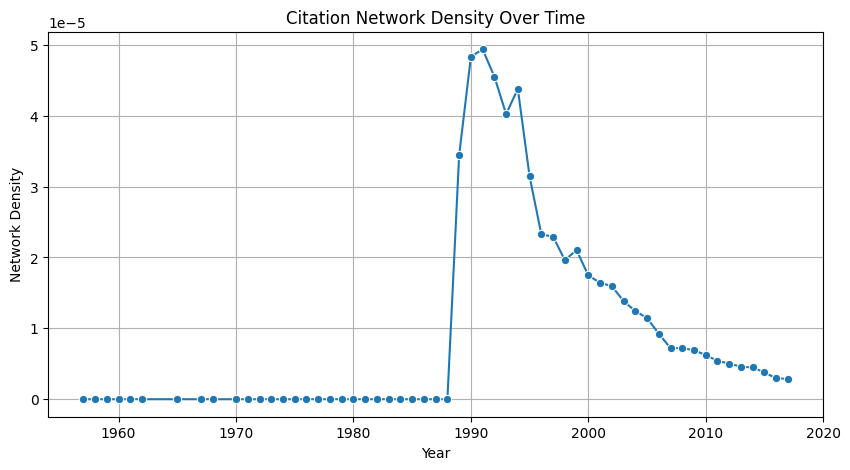

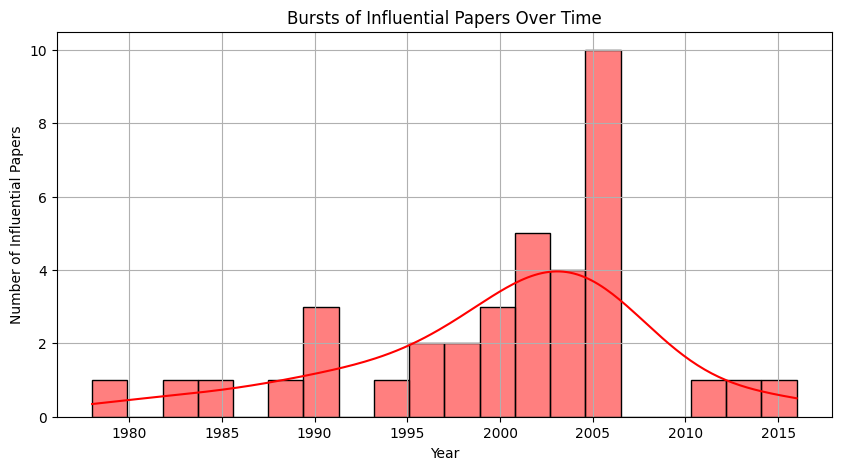

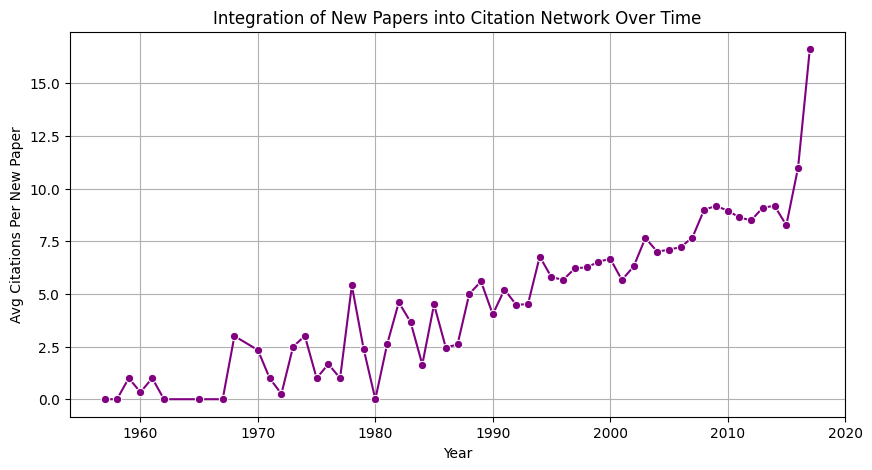

In [ ]:
# Load only necessary columns to reduce memory usage
df = pd.read_csv(file_path, usecols=["id", "references", "year"])

df = df.sample(frac=0.01, random_state=42)


# Convert 'references' from string to list
df["references"] = df["references"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
)

# Get unique years
years = sorted(df["year"].unique())

# 1️⃣ Network Density Per Year
network_density = {}

for year in years:
    G = nx.DiGraph()  # Directed citation graph

    # Filter papers published up to the given year
    df_year = df[df["year"] <= year]

    # Add edges where a citation occurs
    for _, row in df_year.iterrows():
        citing_paper = row["id"]
        G.add_node(citing_paper)  # Ensure paper node exists
        for ref_id in row["references"]:
            if ref_id in df_year["id"].values:  # Only consider references within dataset
                G.add_edge(ref_id, citing_paper)

    # Compute network density
    if len(G.nodes) > 1:  # Avoid division by zero
        network_density[year] = nx.density(G)
    else:
        network_density[year] = 0

# Plot Network Density Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(network_density.keys()), y=list(network_density.values()), marker="o")
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.title("Citation Network Density Over Time")
plt.grid()
plt.show()

# 2️⃣ Detect Bursts of Influential Papers
citation_counts = Counter()
for _, row in df.iterrows():
    for ref in row["references"]:
        citation_counts[ref] += 1  # Count citations received

# Identify papers with sudden citation bursts
df["citations_received"] = df["id"].map(citation_counts)
df_sorted = df.sort_values(by="citations_received", ascending=False)

top_burst_papers = df_sorted[df_sorted["citations_received"] > df_sorted["citations_received"].quantile(0.99)]  # Top 1%

plt.figure(figsize=(10, 5))
sns.histplot(top_burst_papers["year"], bins=20, kde=True, color="red")
plt.xlabel("Year")
plt.ylabel("Number of Influential Papers")
plt.title("Bursts of Influential Papers Over Time")
plt.grid()
plt.show()

# 3️⃣ How New Papers Integrate into the Network
integration_per_year = {}

for year in years:
    df_year = df[df["year"] == year]
    new_edges = sum(len(row["references"]) for _, row in df_year.iterrows())
    integration_per_year[year] = new_edges / len(df_year) if len(df_year) > 0 else 0  # Avg new connections per paper

plt.figure(figsize=(10, 5))
sns.lineplot(x=list(integration_per_year.keys()), y=list(integration_per_year.values()), marker="o", color="purple")
plt.xlabel("Year")
plt.ylabel("Avg Citations Per New Paper")
plt.title("Integration of New Papers into Citation Network Over Time")
plt.grid()
plt.show()

# 2 Data Extrapolation via Clustering

## 2.1 Community Detection

Build the netwoek

In [ ]:
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 859.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import ast
import pandas as pd
import networkx as nx
from itertools import combinations
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from community import community_louvain
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from keybert import KeyBERT
from collections import Counter

# Load only necessary columns
df = pd.read_csv(file_path, usecols=["id", "authors", "title", "abstract", "venue"])

# Sample data to reduce computation time
df = df.sample(frac=0.005, random_state=42)

# Convert 'authors' from string to list
df["authors"] = df["authors"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
)

# Build Graph
G = nx.Graph()

# Add edges between co-authors
for _, row in df.iterrows():
    authors = row["authors"]
    for a1, a2 in combinations(authors, 2):  # Create edges for all co-authors
        if G.has_edge(a1, a2):
            G[a1][a2]["weight"] += 1  # Increase weight if they co-authored multiple papers
        else:
            G.add_edge(a1, a2, weight=1)

# Add metadata (list of papers per author)
author_papers = df.explode("authors").groupby("authors")["id"].apply(list).to_dict()
nx.set_node_attributes(G, author_papers, "papers")

# Print basic stats
print(f"Number of nodes (authors): {G.number_of_nodes()}")
print(f"Number of edges (co-authorships): {G.number_of_edges()}")

# Convert to adjacency matrix
nodes = list(G.nodes)
adj_matrix = nx.to_numpy_array(G, nodelist=nodes)


# ------------------ Hierarchical Clustering ------------------ #
#Compute linkage matrix using average linkage
Z = linkage(adj_matrix, method="average")

# Choose number of clusters (adjust threshold as needed)
threshold = 1.0
labels_hierarchical = fcluster(Z, threshold, criterion="distance")

# Assign clustering labels to nodes
hierarchical_partition = {node: labels_hierarchical[i] for i, node in enumerate(nodes)}



# ------------------ Spectral Clustering ------------------ #
spectral_clustering = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
labels_spectral = spectral_clustering.fit_predict(adj_matrix)

# ------------------ Louvain Clustering ------------------ #
louvain_partition = community_louvain.best_partition(G)
labels_louvain = [louvain_partition[node] if node in louvain_partition else -1 for node in nodes]

# ------------------ Evaluation ------------------ #
def evaluate_clustering(labels):
    condensed_matrix = squareform(pdist(adj_matrix))
    return silhouette_score(condensed_matrix, labels, metric="precomputed")

scores = {
    #"Hierarchical": evaluate_clustering(labels_hierarchical),
    "Spectral": evaluate_clustering(labels_spectral),
    "Louvain": evaluate_clustering(labels_louvain),
}

best_algo = max(scores, key=scores.get)
print(f"Best algorithm: {best_algo} with score {scores[best_algo]:.4f}")

# ------------------ Keyword Extraction & Community Naming ------------------ #
best_labels = labels_spectral if best_algo == "Spectral" else labels_louvain
author_community = {author: best_labels[i] for i, author in enumerate(nodes)}

# Associate papers with communities
paper_communities = {}
for author, papers in author_papers.items():
    community = author_community.get(author, -1)
    for paper in papers:
        paper_communities.setdefault(paper, set()).add(community)

# Extract Keywords using KeyBERT
kw_model = KeyBERT()
df["keywords"] = df.apply(
    lambda row: kw_model.extract_keywords(f"{row['title']} {row['abstract']}", keyphrase_ngram_range=(1, 2), stop_words="english"),
    axis=1,
)

# Aggregate keywords for each community
community_keywords = {c: [] for c in set(best_labels)}
for paper, communities in paper_communities.items():
    keywords = df.loc[df["id"] == paper, "keywords"].values
    if len(keywords) > 0:
        for community in communities:
            if community != -1:
                community_keywords[community].extend([kw[0] for kw in keywords[0]])

# Determine top keywords for each community
top_keywords_per_community = {
    c: [kw for kw, _ in Counter(kw_list).most_common(3)] for c, kw_list in community_keywords.items()
}

# Name communities based on dominant keywords
community_names = {
    c: " ".join(top_keywords_per_community[c]) for c in top_keywords_per_community
}

print("Community Names:", community_names)

Number of nodes (authors): 14820
Number of edges (co-authorships): 26409
Best algorithm: Louvain with score 0.2049
Community Names: {0: 'parallelization hevc hevc encoding alternative hevc', 1: 'concurrency isolation concurrency storage engine', 2: 'camera fpga position camera orientation camera', 3: 'visual tracking bayesian filtering multiple cameras', 4: 'crowdsourcing services crowdsourcing service crowdsourcing development', 5: 'microscopy deconvolution deconvolution algorithm microscopy restoration', 6: 'features weighted weighted feature minimization logistic', 7: 'speech reconstruction auditory cortex human auditory', 8: 'infection dynamics measuring outbreak risk water', 9: 'instruction learning long jump assisted instruction', 10: 'scheduling framework adaptive scheduling scheduling schemes', 11: 'networks manet reputation mobile hoc networks', 12: 'social participation technology mediated participation theory', 13: 'gpu computational nvidia compute ray traversal', 14: 'distr

## 2.2 Naming the Communities

In [ ]:
for community, keywords in community_keywords.items():
    print(f"Community {community}: {keywords}")

Community 0: ['parallelization hevc', 'hevc encoding', 'alternative hevc', 'overhead hevc', 'hevc using', 'distributed scheduling', 'scheduling benevolent', 'clouds nan', 'scheduling', 'adaptation distributed', 'matrix powers', 'parallel algorithms', 'matrix multiplication', 'algorithms matrix', 'distributed memory']
Community 1: ['concurrency', 'isolation concurrency', 'storage engine', 'minimizes transactions', 'storage engines']
Community 2: ['camera fpga', 'position camera', 'orientation camera', 'controlled camera', 'smart camera']
Community 3: ['visual tracking', 'bayesian filtering', 'multiple cameras', 'particle filter', 'tracking using']
Community 4: ['crowdsourcing services', 'crowdsourcing service', 'crowdsourcing development', 'workflow crowdsourcing', 'mobile crowdsourcing']
Community 5: ['microscopy deconvolution', 'deconvolution algorithm', 'microscopy restoration', 'iterative deconvolution', '3d microscopy']
Community 6: ['features weighted', 'weighted feature', 'minimi

## 2.3 Paper-Paper Clustering via Embedding

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, jaccard_score
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Add community keywords to each paper
def get_community_keywords(paper_id):
    communities = paper_communities.get(paper_id, [])
    keywords = set()
    for community in communities:
        keywords.update(community_keywords.get(community, []))
    return " ".join(keywords)

df["community_keywords"] = df["id"].apply(get_community_keywords)

# ------------------ Embedding Abstracts & Titles ------------------ #
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Combine title, abstract, and community keywords
df["combined_text"] = df.apply(
    lambda row: f"{row['title']} {row['abstract']} {row['community_keywords']}", axis=1
)

# Generate embeddings
embeddings = embedder.encode(df["combined_text"].tolist())

# ------------------ Clustering Papers ------------------ #
kmeans = KMeans(n_clusters=5, random_state=42)
paper_labels = kmeans.fit_predict(embeddings)

# ------------------ Evaluation ------------------ #
dbi_score = davies_bouldin_score(embeddings, paper_labels)
sil_score = silhouette_score(embeddings, paper_labels)

print(f"Davies-Bouldin Index: {dbi_score:.4f}")
print(f"Average Silhouette Score: {sil_score:.4f}")

# ------------------ Unique Venue Values ------------------ #
if "venue" in df.columns:
    unique_venues = df["venue"].unique()
    print(f"Unique venues: {unique_venues}")
else:
    print("Venue column not found in the dataset.")

# ------------------ Jaccard Similarity ------------------ #
if "venue" in df.columns:
    le = LabelEncoder()
    venue_labels = le.fit_transform(df["venue"])

    min_len = min(len(venue_labels), len(paper_labels))
    jaccard_sim = jaccard_score(
        venue_labels[:min_len], paper_labels[:min_len], average="macro"
    )
    print(f"Jaccard Similarity Index with venue clustering: {jaccard_sim}")
else:
    print("Jaccard Similarity not computed as 'venue' column is missing.")


Davies-Bouldin Index: 4.5911
Average Silhouette Score: 0.0355
Unique venues: ['multimedia signal processing'
 'international conference on enterprise information systems'
 'Journal of Systems Architecture' ... 'American Mathematical Monthly'
 'Frontiers in ICT' 'digital game and intelligent toy enhanced learning']
Jaccard Similarity Index with venue clustering: 0.0


# 3. Citation Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

# Load the dataset
df = pd.read_csv(file_path, usecols=["id", "title", "abstract", "n_citation"])
df = df.sample(frac=0.005, random_state=42)

# Drop missing values
df.dropna(subset=["title", "abstract", "n_citation"], inplace=True)

# Combine title and abstract
df["text"] = df["title"] + " " + df["abstract"]

# SentenceTransformer for embedding
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    embeddings, df["n_citation"].values, test_size=0.2, random_state=42
)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/130 [00:00<?, ?it/s]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# GridSearch for Random Forest Regressor
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = best_rf.predict(X_val)

# Metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R²: {r2:.4f}")


Validation RMSE: 126.11
Validation MAE: 45.91
Validation R²: -0.1504


## Testing on Scraped Data

In [ ]:
topics = ["Foundation_Models", "Generative_Models", "LLM", "VLM", "Diffusion_Models"]
folder_path = "/content"

# Create paths dynamically
file_paths = [f"{folder_path}/{topic}_data.json" for topic in topics]

# Load all JSON files into a single list
test_papers = []
for file_path in file_paths:
    with open(file_path, "r") as f:
        data = json.load(f)
        for item in data:
            test_papers.extend(item.get("papers", []))  # Access 'papers' key

# ------------------ Preprocess Test Data ------------------ #
def preprocess_text(text):
    if text is None:
        return ""  # Handle null abstracts
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    return text.strip()


# Apply preprocessing
test_texts = [
    preprocess_text((paper.get("title") or "") + " " + (paper.get("abstract") or ""))
    for paper in test_papers
]

# ------------------ Embed Test Data ------------------ #
X_test = model.encode(test_texts)  # Using the SentenceTransformer model

# ------------------ Predict & Evaluate ------------------ #
# Assuming 'citation_count' is available in the test data
y_true = [paper.get("citations", 0) for paper in test_papers]
y_pred = best_rf.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# ------------------ Results ------------------ #
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 560.5178
Mean Absolute Error (MAE): 113.1142
R² Score: -0.0367


# Product

In [4]:
!pip install faiss-cpu sentence-transformers psycopg2-binary
!pip install tqdm
!pip install tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 806.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [2]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm
from tabulate import tabulate


# Load the dataset
file_path = "dblp-v10.csv"
chunksize = 10000
data_chunks = []

# Read dataset in chunks
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk = chunk[['title', 'abstract', 'authors']].dropna()
    data_chunks.append(chunk)

# Combine all chunks into a single DataFrame
df = pd.concat(data_chunks, ignore_index=True)
print(f"Loaded {len(df)} papers")



device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

def compute_embeddings(texts):
    """Compute embeddings in batches with progress tracking."""
    batch_size = 32
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Computing embeddings"):
        batch = texts[i:i+batch_size]
        with torch.no_grad():
            emb = model.encode(batch, convert_to_tensor=True, device=device).cpu().numpy()
        embeddings.append(emb)
    return np.vstack(embeddings)

# Generate embeddings with progress bar
df['combined_text'] = df['title'] + " " + df['abstract']
embeddings = compute_embeddings(df['combined_text'].tolist())

print(f"Computed {embeddings.shape[0]} embeddings of dimension {embeddings.shape[1]}")

Loaded 827532 papers


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Computing embeddings: 100%|██████████| 25861/25861 [38:25<00:00, 11.22it/s]


Computed 827532 embeddings of dimension 384


In [5]:
import faiss

embedding_dim = embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)  # L2 (Euclidean) similarity search
index.add(embeddings)  # Add all embeddings to FAISS index

# Save FAISS index
faiss.write_index(index, "faiss_index.bin")
df.to_csv("processed_papers.csv", index=False)

print("FAISS index saved successfully.")


FAISS index saved successfully.


In [6]:
def search_papers(query, top_k=5):
    """Retrieve top_k most relevant papers and format output nicely."""
    query_embedding = model.encode([query], convert_to_tensor=True, device=device).cpu().numpy()
    distances, indices = index.search(query_embedding, top_k)

    results = df.iloc[indices[0]][['title', 'abstract', 'authors']]

    print("\n" + "="*80)
    print(f"Top {top_k} Results for Query: '{query}'")
    print("="*80 + "\n")

    for i, row in results.iterrows():
        print(f"**Title:** {row['title']}\n")
        print(f"**Abstract:** {row['abstract'][:500]}{'...' if len(row['abstract']) > 500 else ''}\n")
        print(f"**Authors:** {row['authors']}\n")
        print("-" * 80 + "\n")

    return results

# Example Search
query = "Neural networks for NLP"
results = search_papers(query, top_k=5)

query = "GAN for Text"
results = search_papers(query, top_k=5)


Top 5 Results for Query: 'Neural networks for NLP'

**Title:** Are Deep Learning Approaches Suitable for Natural Language Processing

**Abstract:** In recent years, Deep Learning (DL) techniques have gained much at-tention from Artificial Intelligence (AI) and Natural Language Processing (NLP) research communities because these approaches can often learn features from data without the need for human design or engineering interventions. In addition, DL approaches have achieved some remarkable results. In this paper, we have surveyed major recent contributions that use DL techniques for NLP tasks. All these reviewed topics have been limited t...

**Authors:** ['S. Alshahrani', 'Epaminondas Kapetanios']

--------------------------------------------------------------------------------

**Title:** Natural language grammatical inference with recurrent neural networks

**Abstract:** This paper examines the inductive inference of a complex grammar with neural networks and specifically, the ta

In [7]:
import spacy

# Load an NER model for author extraction (use 'en_core_web_sm' or a larger one like 'en_core_web_trf')
nlp = spacy.load("en_core_web_sm")

def extract_author_name(text):
    """Extracts potential author names using Named Entity Recognition (NER)."""
    doc = nlp(text)
    authors = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return authors

def search_papers(query=None, author=None, top_k=5):
    """Retrieve top_k most relevant papers based on query or author name."""
    if query:
        query_embedding = model.encode([query], convert_to_tensor=True, device=device).cpu().numpy()
        distances, indices = index.search(query_embedding, top_k)
        results = df.iloc[indices[0]][['title', 'abstract', 'authors']]
    elif author:
        # Use NER to extract author name
        extracted_authors = extract_author_name(author)
        if extracted_authors:
            author_name = extracted_authors[0]  # Taking the first detected author name
        else:
            author_name = author  # If NER fails, use input directly

        # Search database for the author
        results = df[df['authors'].str.contains(author_name, case=False, na=False)].head(top_k)
    else:
        print("Please provide either a query or an author name.")
        return None

    print("\n" + "=" * 80)
    if query:
        print(f"Top {top_k} Results for Query: '{query}'")
    else:
        print(f"Top {top_k} Results for Author: '{author_name}'")
    print("=" * 80 + "\n")

    for _, row in results.iterrows():
        print(f"**Title:** {row['title']}\n")
        print(f"**Abstract:** {row['abstract'][:500]}{'...' if len(row['abstract']) > 500 else ''}\n")
        print(f"**Authors:** {row['authors']}\n")
        print("-" * 80 + "\n")

    return results

query_results = search_papers(query="Neural networks for NLP", top_k=5)
author_results = search_papers(author="'S. Lawrence", top_k=5)



Top 5 Results for Query: 'Neural networks for NLP'

**Title:** Are Deep Learning Approaches Suitable for Natural Language Processing

**Abstract:** In recent years, Deep Learning (DL) techniques have gained much at-tention from Artificial Intelligence (AI) and Natural Language Processing (NLP) research communities because these approaches can often learn features from data without the need for human design or engineering interventions. In addition, DL approaches have achieved some remarkable results. In this paper, we have surveyed major recent contributions that use DL techniques for NLP tasks. All these reviewed topics have been limited t...

**Authors:** ['S. Alshahrani', 'Epaminondas Kapetanios']

--------------------------------------------------------------------------------

**Title:** Natural language grammatical inference with recurrent neural networks

**Abstract:** This paper examines the inductive inference of a complex grammar with neural networks and specifically, the ta

In [8]:
from transformers import pipeline

def summarize_paper_local(title, abstract, authors, model="facebook/bart-large-cnn"):
    """Summarize the research paper using a local transformer model."""
    summarizer = pipeline("summarization", model=model)

    prompt = f"""
    Summarize the following research paper concisely:

    **Title:** {title}
    **Abstract:** {abstract}
    **Authors:** {", ".join(authors)}

    The summary should be clear and highlight the key contributions of the paper.
    """

    summary = summarizer(prompt, max_length=150, min_length=50, do_sample=False)
    return summary[0]['summary_text']

title = "Are Deep Learning Approaches Suitable for Natural Language Processing"
abstract = "In recent years, Deep Learning (DL) techniques have gained much attention from AI and NLP research communities..."
authors = ['S. Alshahrani', 'Epaminondas Kapetanios']

summary = summarize_paper_local(title, abstract, authors)
print("**Paper Summary:**\n", summary)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


**Paper Summary:**
 Deep Learning (DL) techniques have gained much attention from AI and NLP research communities. The summary should be clear and highlight the key contributions of the paper. Summarize the following research paper concisely: Are Deep Learning Approaches Suitable for Natural Language Processing?


In [9]:
for i, row in results.iterrows():

      title = row['title']
      abstract = row['abstract']
      authors = row['authors']

      summary = summarize_paper_local(title, abstract, authors)
      print("**Paper Summary:**\n", summary)
      print("-" * 80 + "\n")

Device set to use cuda:0


**Paper Summary:**
 Stacked Generative Adversarial Networks (StackGAN) can generate photo-realistic images conditioned on text descriptions. StackGAN for the first time generates realistic 256 x 256 images. State-of-the-art methods can generate at most 128 x 128 images. The Stage-II GAN can rectify defects and add compelling details.
--------------------------------------------------------------------------------



Device set to use cuda:0


**Paper Summary:**
 This paper describes a method for using Generative Adversarial Networks to learn distributed representations of natural language documents. We propose a model that is based on the recently proposed Energy-Based GAN, but instead uses a Denoising Autoencoder as the discriminator network. Document representations are extracted from the hidden layer of the discriminators and evaluated both quantitatively and qualitatively.
--------------------------------------------------------------------------------



Device set to use cuda:0


**Paper Summary:**
 This report summarizes the tutorial presented by the author at NIPS 2016 on generative adversarial networks (GANs) The tutorial describes: (1) Why generative modeling is a topic worth studying, (2) how generative models work, and (3) how GANs compare to other models. The report also includes three exercises for readers to complete.
--------------------------------------------------------------------------------



Device set to use cuda:0


**Paper Summary:**
 Generative Adversarial Text to Image Synthesis (GAN) is a new type of AI system. GANs can generate images of specific categories, such as faces, album covers, and room interiors. We demonstrate the capability of our model to generate plausible images of birds and flowers from detailed text descriptions.
--------------------------------------------------------------------------------



Device set to use cuda:0


**Paper Summary:**
 Generative adversarial networks (GANs) learn to synthesise new samples from a high-dimensional distribution by passing samples drawn from a latent space through a generative network. This paper introduces techniques for projecting image samples into the latent space using any pre-trained GAN. We evaluate these techniques on both MNIST digits and Omniglot handwritten characters.
--------------------------------------------------------------------------------

